### Objectives

This notebook is used to create a simple model to predict the price of a house based on its size. Our main objective is how can we build end to end project using machine learning.

### Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix,auc, ConfusionMatrixDisplay, precision_recall_curve

### Read dataset

In [4]:
df = pd.read_csv("data/train.csv")

/var/folders/b9/rpbdtb191bd5fhsqy8l2j8g00000gp/T/ipykernel_41744/1366839329.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/train.csv")


In [5]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [6]:
df.shape

(1687861, 23)

In [7]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [9]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [10]:
#the percentage of missing values in each column
df.isna().mean() * 100

sku                  0.000000
national_inv         0.000059
lead_time            5.977625
in_transit_qty       0.000059
forecast_3_month     0.000059
forecast_6_month     0.000059
forecast_9_month     0.000059
sales_1_month        0.000059
sales_3_month        0.000059
sales_6_month        0.000059
sales_9_month        0.000059
min_bank             0.000059
potential_issue      0.000059
pieces_past_due      0.000059
perf_6_month_avg     0.000059
perf_12_month_avg    0.000059
local_bo_qty         0.000059
deck_risk            0.000059
oe_constraint        0.000059
ppap_risk            0.000059
stop_auto_buy        0.000059
rev_stop             0.000059
went_on_backorder    0.000059
dtype: float64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


### Cleaning data

we started to drop null values because the percentage of missing values is very low

In [13]:
df.dropna(inplace=True)

In [14]:
#drop sku colummns

df.drop(columns="sku", inplace=True)

In [15]:
df.shape

(1586967, 22)

In [16]:
#catergorical columns

numerical = df.select_dtypes(include=['int64', 'float64']).columns
categorical = df.select_dtypes(include=['object']).columns

In [17]:
#remove column went ot backorder from categorical
categorical = categorical.drop('went_on_backorder')

### EDA

In [18]:
#split the data into train and test

df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)

In [19]:
df_train["went_on_backorder"].value_counts()

went_on_backorder
No     1181983
Yes       8242
Name: count, dtype: int64

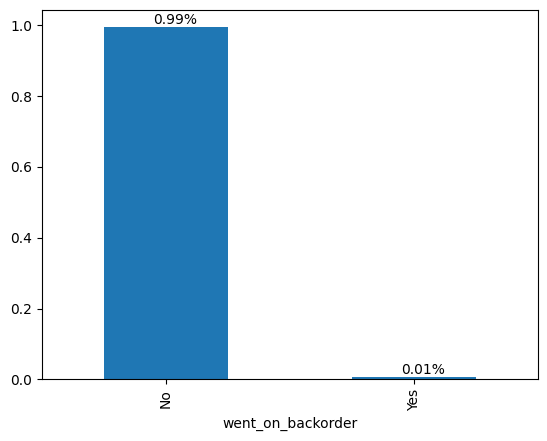

In [20]:
#### distribution of the target variable

ax = df_train["went_on_backorder"].value_counts(normalize=True).plot(kind="bar")

for i in ax.patches:
    ax.text(i.get_x() + 0.2, i.get_height() + 0.01, str(round(i.get_height(), 2)) + '%', fontsize=10, color='black')

plt.show()

the datasett is imbalanced

#### cateogorical columns

##### check the category distribution of the categorical columns

In [21]:
categorical

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop'],
      dtype='object')

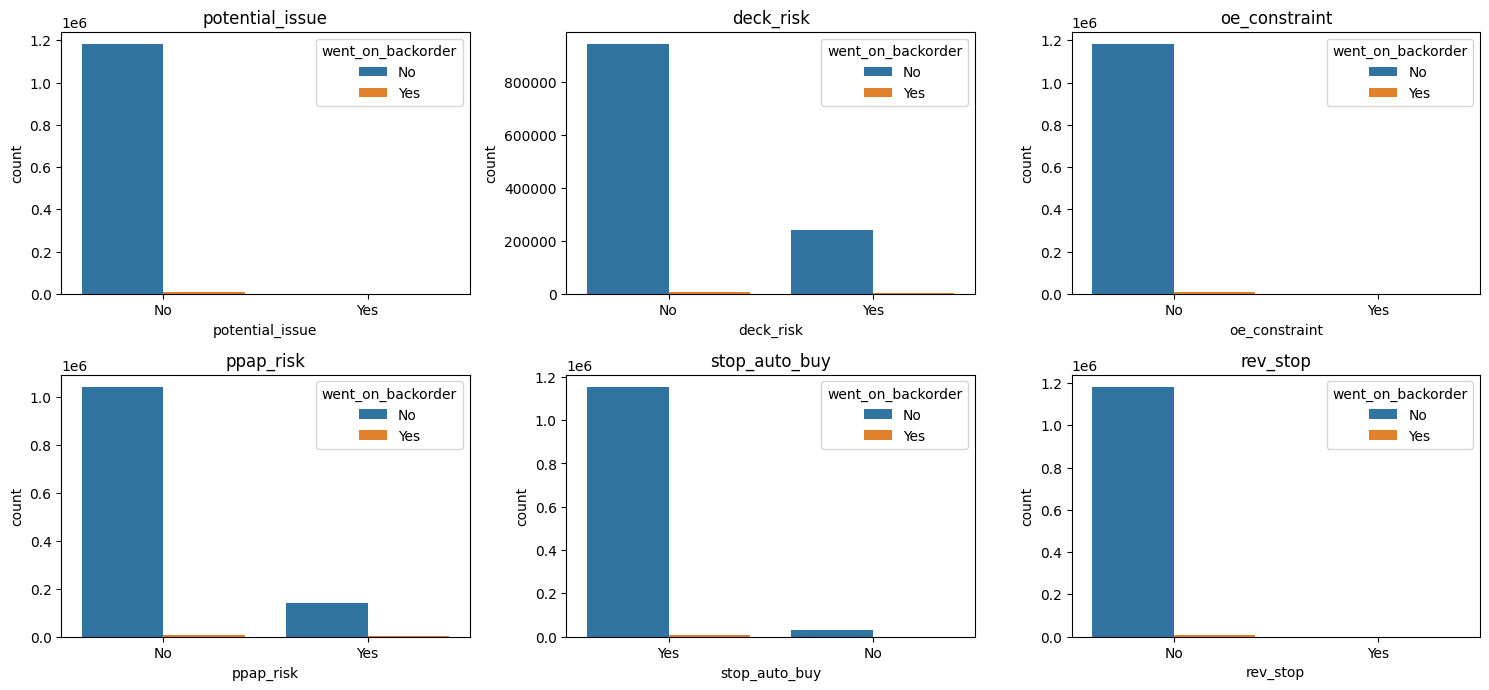

In [22]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df_train, x=col, hue='went_on_backorder')
    plt.title(col)  # Add title for each subplot
    plt.tight_layout()

plt.show()

we can see if the category in categorical column can be converted to numerical or boolean

for the categorical columns, we can use the chi-square test to check the relationship between the categorical columns and the target variable.

In [23]:
chi2_value = []
p_value = []

for col in categorical:
    category_data = pd.crosstab(df_train[col],df_train["went_on_backorder"])
    chi2, p, dof, expected = chi2_contingency(category_data.values)
    chi2_value.append(chi2)
    p_value.append(p)

chi2_test = pd.DataFrame({"Feature":categorical, "Chi2":chi2, "P-Value":p_value})

In [24]:
chi2_test.sort_values(by="P-Value")

,Feature,Chi2,P-Value
0,potential_issue,1.272268,8.515552e-61
3,ppap_risk,1.272268,1.185459e-23
1,deck_risk,1.272268,3.537920e-14
2,oe_constraint,1.272268,5.791011e-03
4,stop_auto_buy,1.272268,4.291491e-02
5,rev_stop,1.272268,2.593416e-01


we can see if the "rev_stop" column has p-value more than 0.05, so we can remove this column from the dataset.

##### Numerical columns

In [25]:
numerical

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

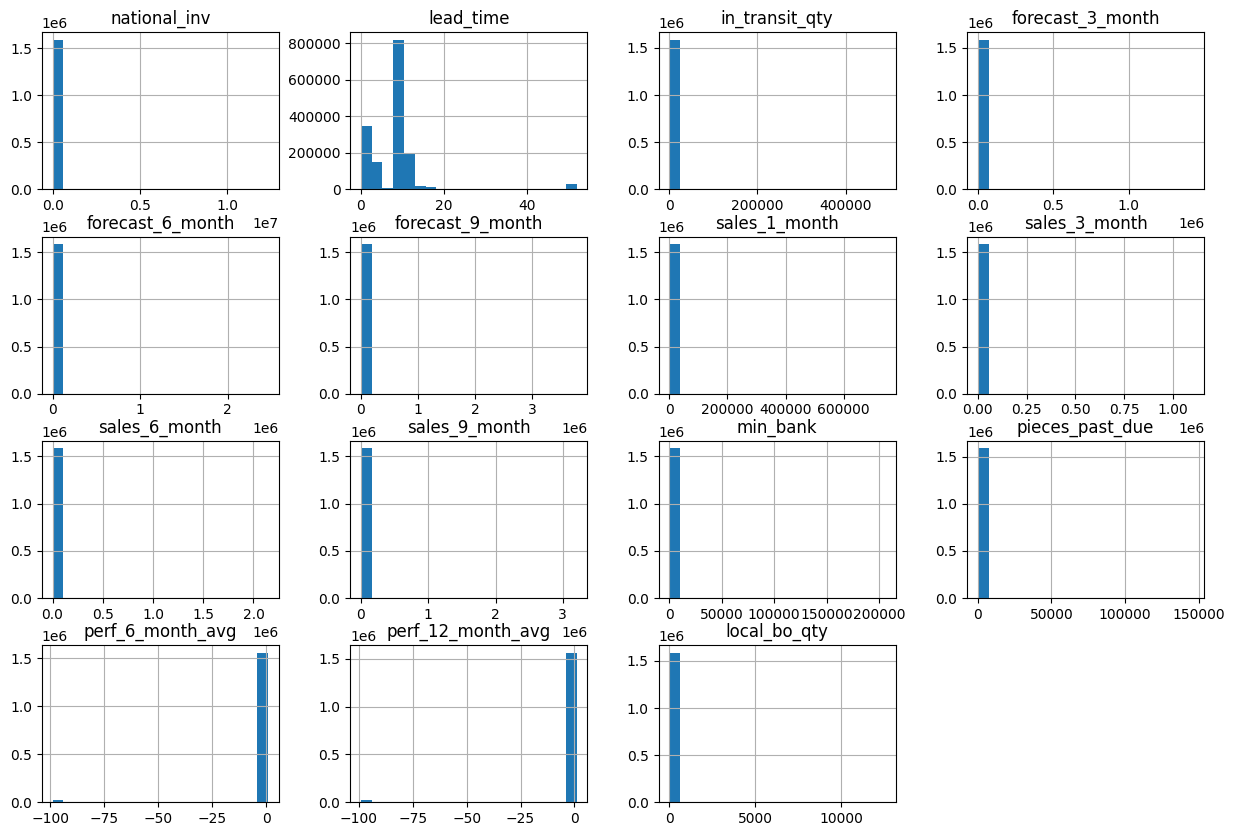

In [26]:
df[numerical].hist(bins=20, figsize=(15, 10))
plt.show()

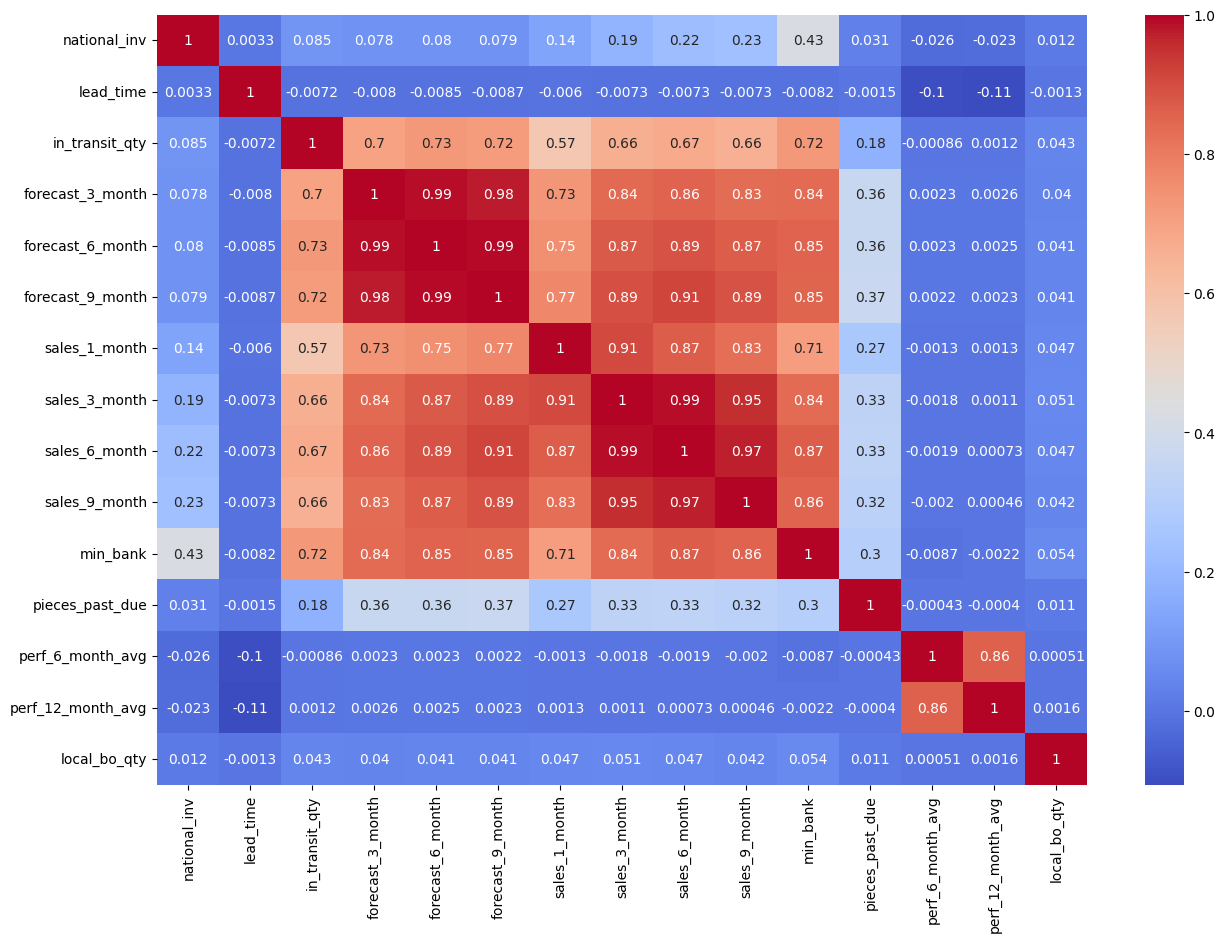

In [27]:
#check correlation between numerical columns
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical].corr(), annot=True, cmap="coolwarm")
plt.show()

### Feature Engineering

there are two points to note here for the categorical data will convert to bool or numerical then for numerical dataset will do scaling using standard scaler

In [28]:
df_train["went_on_backorder"].value_counts()

went_on_backorder
No     1181983
Yes       8242
Name: count, dtype: int64

In [29]:
df_train["went_on_backorder"] = df_train["went_on_backorder"].map({"Yes": 1, "No": 0})
df_test["went_on_backorder"] = df_test["went_on_backorder"].map({"Yes": 1, "No": 0})

In [30]:
df_train.drop(columns="rev_stop", inplace=True)
df_test.drop(columns = "rev_stop", inplace=True)

In [31]:
categorical = categorical.drop("rev_stop")

In [32]:
# make X_train, y_train, X_test, y_test

X_train = df_train.drop(columns="went_on_backorder")
y_train = df_train["went_on_backorder"]

X_test = df_test.drop(columns="went_on_backorder")
y_test = df_test["went_on_backorder"]

In [33]:
# numerical_min = ["national_inv", "perf_6_month_avg", "perf_12_month_avg"]
# numerical_pos = numerical.drop(numerical_min)

In [34]:
numerical

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

In [35]:
categorical

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy'],
      dtype='object')

In [209]:
numeric_transformer_min = StandardScaler()
# numeric_transformer = FunctionTransformer(np.log1p, validate=True)
numeric_transformer = PowerTransformer(method = 'yeo-johnson', standardize=True)
categorical_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    transformers=[
        # ('num_min', numeric_transformer_min, numerical_min),
        # ('num_pos', numeric_transformer, numerical_pos),
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)     
        # ('num', numeric_transformer, numerical),
        # ('cat', categorical_transformer, categorical)
    ]
)

# append smote to the pipeline
# smote  = SMOTE(random_state=0, sampling_strategy="not minority"j
# smote = SMOTE(random_state=0, sampling_strategy=0.8)  # Adjust the value as needed
under_sampler = RandomUnderSampler(sampling_strategy=0.3)

imbalance_pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    # ('smote', smote),
    ('under_sampler', under_sampler)
]).set_output(transform="default")



In [210]:
X_smote, y_smote = imbalance_pipeline.fit_resample(X_train, y_train)

In [211]:
X_test_transformed = preprocessor.transform(X_test)

check total label after undersampling

In [212]:
print("number of data before under sampling:")
print(y_train.value_counts())

print("---------------------------------")
print("number of data after under sampling:")
print(y_smote.value_counts())

number of data before under sampling:
went_on_backorder
0    1181983
1       8242
Name: count, dtype: int64
---------------------------------
number of data after under sampling:
went_on_backorder
0    27473
1     8242
Name: count, dtype: int64


for scoring, we will more focus on the recall, precision and AUC score. Because as we know this case is like a fraud case, we need to minimize the False Negative (predicting the backorder as no backorder) and maximize the True Positive (predicting the backorder as backorder). So, we will use the recall score as the main metric.

**Basedline model (logistic regression and Naive Bayes)**

In [213]:
def metric_score (y_true,y_pred, y_smote, y_train_pred, y_pred_proba):
    recall_train = recall_score(y_smote, y_train_pred)
    recall = recall_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba[:,1])
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    return pd.DataFrame({"recall_train":[recall_train], "recall":[recall], "precision":[precision], "accuracy":[accuracy], "auc":[auc]})

In [214]:
#### Model Building

logreg= LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_smote, y_smote)

y_train_pred = logreg.predict(X_smote)
y_pred = logreg.predict(X_test_transformed)


In [215]:
metric_score(y_test, y_pred, y_smote, y_train_pred, y_pred_proba)

,recall_train,recall,precision,accuracy,auc
0,0.593788,0.592593,0.047682,0.91585,0.97342


In [216]:
#using gauysianNB
nb = GaussianNB()

nb.fit(X_smote, y_smote)

y_train_pred = nb.predict(X_smote)
y_pred = nb.predict(X_test_transformed)
y_pred_proba = nb.predict_proba(X_test_transformed)


In [217]:
metric_score(y_test, y_pred, y_smote, y_train_pred, y_pred_proba)

,recall_train,recall,precision,accuracy,auc
0,0.470032,0.456912,0.030433,0.896212,0.819778


based on the baseline model we can see if the score is good for recall but for the precission is too low

**check in some models with testing data**

In [218]:
random_state = 0

In [219]:
model = {"dt" : DecisionTreeClassifier(random_state=random_state),
         "lgbm": LGBMClassifier(random_state=random_state, verbose = -1),
         "xgb": XGBClassifier(random_state=random_state),
         "rf": RandomForestClassifier(random_state=random_state)}


for k,v in model.items():
    model = v
    model.fit(X_smote, y_smote)
    y_train_pred = model.predict(X_smote)
    y_pred = model.predict(X_test_transformed)
    y_pred_proba = model.predict_proba(X_test_transformed)
    print(f"Model: {k}")
    print(metric_score(pd.Series(y_test), pd.Series(y_pred), y_smote, y_train_pred, y_pred_proba))
    print("-------------------------------------------------")

Model: dt
   recall_train    recall  precision  accuracy       auc
0       0.99272  0.791713   0.066459  0.922128  0.860566
-------------------------------------------------
Model: lgbm
   recall_train    recall  precision  accuracy       auc
0      0.808178  0.774111   0.092405  0.946187  0.957415
-------------------------------------------------
Model: xgb
   recall_train    recall  precision  accuracy       auc
0        0.8777  0.803447   0.098663  0.948198  0.963378
-------------------------------------------------
Model: rf
   recall_train    recall  precision  accuracy       auc
0      0.994298  0.857719   0.116699  0.954399  0.974333
-------------------------------------------------


based on the result above, we will use xgb model as main model 

In [220]:

model = XGBClassifier(random_state=random_state)

model.fit(X_smote, y_smote)

y_train_pred = model.predict(X_smote)
y_pred = model.predict(X_test_transformed)
y_pred_proba = model.predict_proba(X_test_transformed)[:,1]

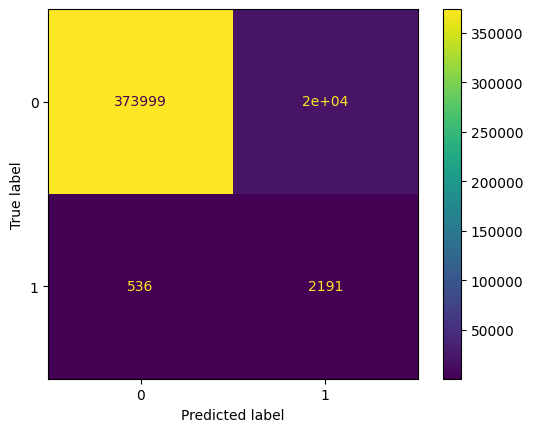

In [221]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

plt.show()

In [222]:
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


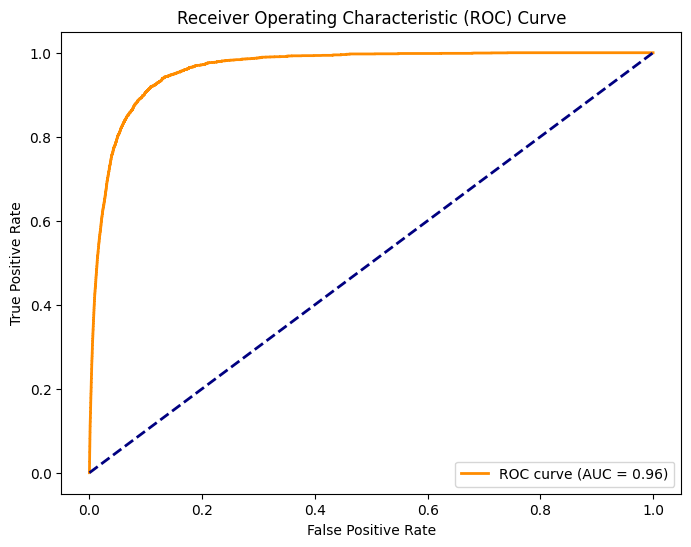

In [226]:
plot_roc_curve(y_test, y_pred_proba)

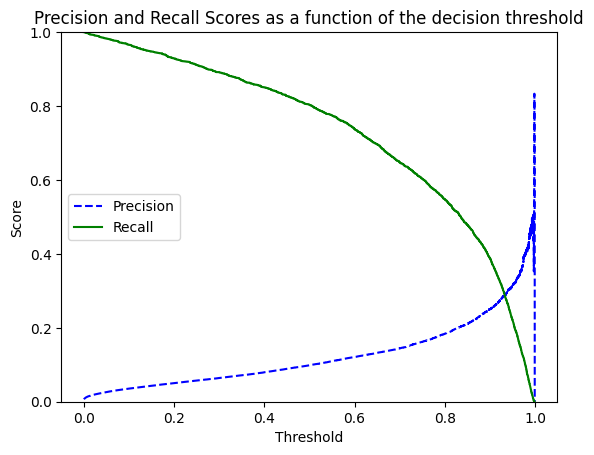

In [231]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")

plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plt.xlabel("Threshold")
plt.ylabel("Score")

plt.legend(loc="center left")
plt.title("Precision and Recall Scores as a function of the decision threshold")

plt.ylim([0, 1])

plt.show()